##### Brain Tumor Classification using KNN and PCA
##### 
##### This notebook demonstrates how to classify brain tumor images using a K-Nearest Neighbors (KNN) classifier with Principal Component Analysis (PCA) for dimensionality reduction. The dataset is preprocessed, and an imbalanced class distribution is handled using SMOTE. We evaluate model performance using various metrics and visualizations.

##### Source - [https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor/data]

In [3]:
#Import all required dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [4]:
#Load dataset paths
feature_csv = "/Users/prudhvileo/Downloads/brain_tumor/Brain Tumor.csv"
feature_assessment_csv = "/Users/prudhvileo/Downloads/brain_tumor/bt_dataset_t3.csv"

In [6]:
# Load Feature Dataset
df = pd.read_csv(feature_csv)
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [25]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [29]:
df.corr

<bound method DataFrame.corr of           Image  Class       Mean     Variance  Standard Deviation   Entropy  \
0        Image1      0   6.535339   619.587845           24.891522  0.109059   
1        Image2      0   8.749969   805.957634           28.389393  0.266538   
2        Image3      1   7.341095  1143.808219           33.820234  0.001467   
3        Image4      1   5.958145   959.711985           30.979219  0.001477   
4        Image5      0   7.315231   729.540579           27.010009  0.146761   
...         ...    ...        ...          ...                 ...       ...   
3757  Image3758      0  21.234512  1208.850174           34.768523  0.063774   
3758  Image3759      0  20.435349  1227.151440           35.030721  0.066763   
3759  Image3760      0  18.011520  1151.582765           33.934978  0.068396   
3760  Image3761      0  13.330429   945.732779           30.752769  0.087872   
3761  Image3762      0   6.110138   480.884025           21.929068  0.118171   

      S

In [7]:
#Split the feature and labels X y
X = df.drop(columns=['Image','Class'])
y = df['Class']

In [8]:
#Normalise the data
scalar = StandardScaler()
x_scalar = scalar.fit_transform(X)

In [9]:
# Apply PCA for Dimensionality Reduction
reduced_pca = PCA(n_components=10) #Reduce to 10 principal components
Xpca = reduced_pca.fit_transform(x_scalar)

In [10]:
#Handling imbalanced data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xpca, y)

/Users/prudhvileo/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [11]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
#KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [14]:
# Predictions
y_pred = knn_model.predict(X_test)

In [15]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[443   1]
 [ 11 377]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       444
           1       1.00      0.97      0.98       388

    accuracy                           0.99       832
   macro avg       0.99      0.98      0.99       832
weighted avg       0.99      0.99      0.99       832

ROC-AUC Score: 0.9846986161419152


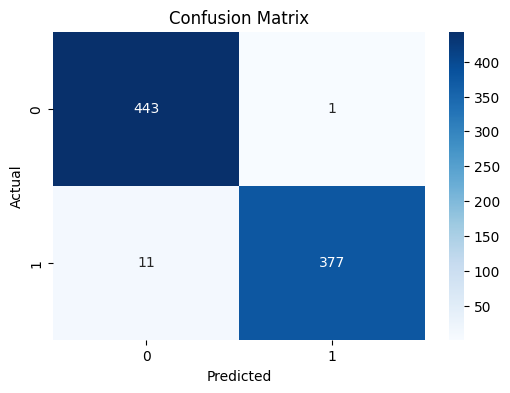

In [16]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

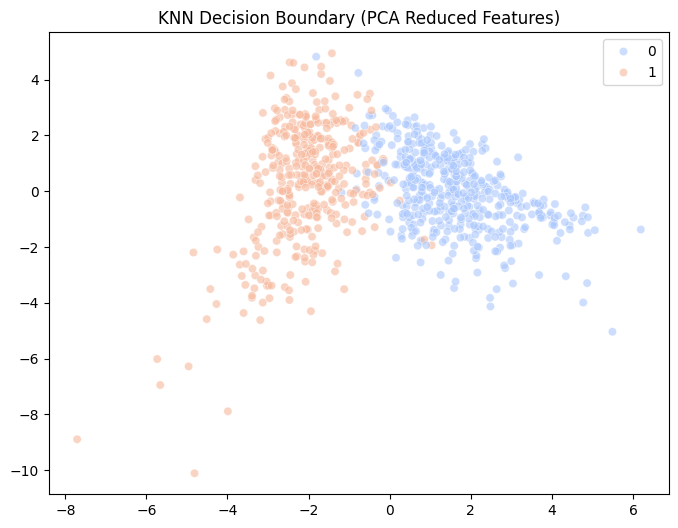

In [17]:
# Visualizing PCA Components
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred, palette='coolwarm', alpha=0.6)
plt.title("KNN Decision Boundary (PCA Reduced Features)")
plt.show()

In [20]:
from sklearn.metrics import balanced_accuracy_score, precision_recall_curve, auc, roc_curve

# Compute additional metrics
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Compute Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

print("Balanced Accuracy:", balanced_acc)
print("Precision-Recall AUC:", pr_auc)


Balanced Accuracy: 0.9846986161419151
Precision-Recall AUC: 0.9911125678683668


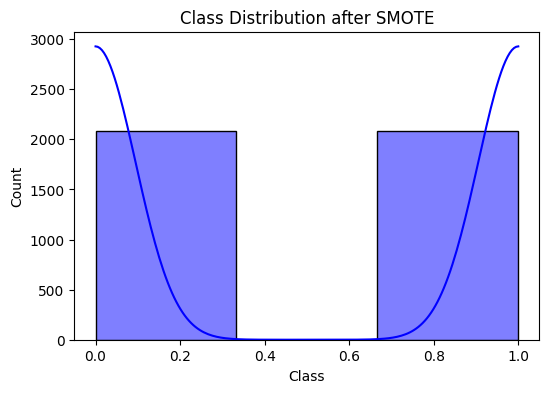

In [19]:
# Histogram of Class Distribution
plt.figure(figsize=(6,4))
sns.histplot(y_resampled, bins=3, kde=True, color='blue')
plt.title("Class Distribution after SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

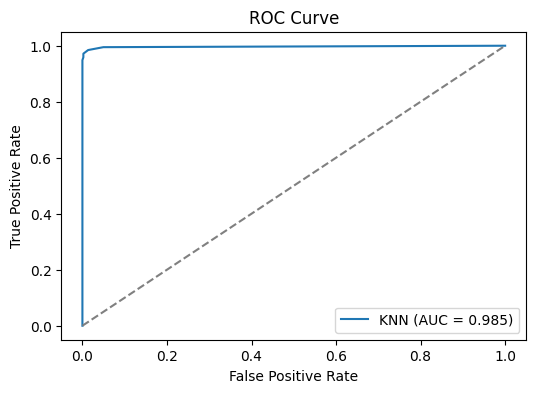

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="KNN (AUC = {:.3f})".format(roc_auc_score(y_test, y_pred)))
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

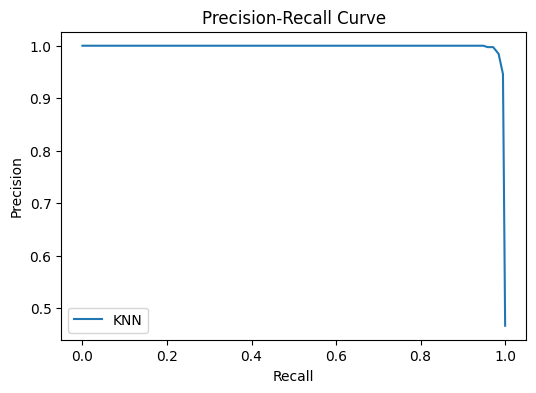

In [22]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label="KNN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## Conclusion

In this project, we implemented a **K-Nearest Neighbors (KNN)** classifier with **Principal Component Analysis (PCA)** for dimensionality reduction to classify brain tumor images.  

### Key Findings:
- **ROC-AUC Score:** **0.9847** → The model performs exceptionally well in distinguishing between classes.
- **Balanced Accuracy:** **0.9847** → The classifier maintains high accuracy across all classes.
- **Precision-Recall AUC:** **0.9911** → The model demonstrates strong precision and recall, ensuring minimal false negatives.  

The results indicate that **KNN with PCA is effective** for this classification task. However, further improvements can be explored using **hyperparameter tuning, additional feature selection, and alternative models like SVM or deep learning approaches.**  
